In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from TDM import CreateDiagonals,tridiag, TDMsolve, TDMmultiply, CrankNicolson
from bpm_initial_conditions import GaussianBeam1DRotated
import time
from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-whitegrid')

In [74]:
#tunable parameters
lamb   = 800e-9;          
w0     = 5.0e-06;         
xrange = 500e-06
zrange = 500e-06

# calculated parameters
k0     = 2*pi/lamb;  

In [92]:
def CN_prop(nx,nz):
    deltax  = xrange/nx
    deltaz  = zrange/nz
    x = np.linspace(-nx*deltax/2,nx*deltax/2,nx)
    x_um = np.multiply(x,1e6)
    E0 = GaussianBeam1DRotated( x, 0, w0, k0, 0)
    Ef = GaussianBeam1DRotated( x, zrange, w0, k0, 0)
    E1 = E0
    start = time.time()
    for i in range(int(nz)):
        E1 = CrankNicolson(deltax,k0,E1,deltaz)
    end = time.time()
    print("CN time elapsed = "+str(end-start))
    field = pd.Series([deltax*1e6,deltaz*1e6,x,x_um,E0,Ef,E1],
                      index=['deltax','deltaz','x','x_um','E0','Ef','E1'])
    return(field)

    

In [133]:
field = CN_prop(1000,1000)

CN time elapsed = 1.7168529033660889


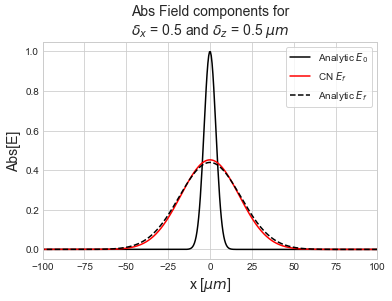

In [134]:
plt.plot(field["x_um"],np.abs(field["E0"]),'black',label = "Analytic $E_0$")
plt.plot(field["x_um"],np.abs(field["E1"]),'red',label ="CN $E_f$")
plt.plot(field["x_um"],np.abs(field["Ef"]),'black',ls = '--',label ="Analytic $E_f$")
plt.legend(frameon=True)
plt.xlabel('x [$\mu m$]',fontsize = 14)
plt.ylabel('Abs[E]',fontsize = 14)
plt.title("Abs Field components for" +"\n"+ "$\delta_x$ = "+str(field["deltax"])+ " and $\delta_z$ = "+str(field["deltaz"]) +" $\mu m$",
         fontsize=14)
plt.xlim(-100,100)
plt.show()

CN time elapsed = 0.13451099395751953
CN time elapsed = 0.20042896270751953
CN time elapsed = 0.43282008171081543


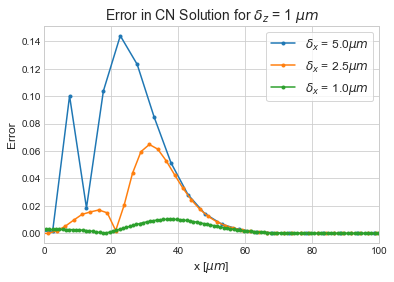

In [153]:
for n in [100,200,500]:
    field = CN_prop(n,500)
    plt.plot(field["x_um"],np.abs(np.abs(field["E1"])-np.abs(field["Ef"])),
             '.-',
            label = "$\delta_x$ = " + str(xrange/n*1e6)+ "$\mu m$")
plt.xlim(0,100)
plt.title("Error in CN Solution for $\delta_z$ = 1 $\mu m$",fontsize = 14 )
plt.legend(frameon=True,fontsize = 12)
plt.ylabel("Error",fontsize =12)
plt.xlabel("x [$\mu m$]",fontsize =12)
plt.show()

CN time elapsed = 0.09614014625549316
CN time elapsed = 0.167586088180542
CN time elapsed = 0.4431161880493164
CN time elapsed = 0.8782260417938232


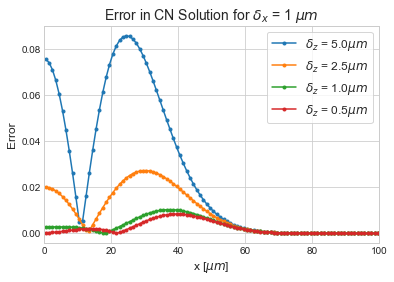

In [157]:
for n in [100,200,500,1000]:
    field = CN_prop(500,n)
    plt.plot(field["x_um"],np.abs(np.abs(field["E1"])-np.abs(field["Ef"])),
             '.-',
            label = "$\delta_z$ = " + str(xrange/n*1e6)+ "$\mu m$")
plt.xlim(0,100)
plt.title("Error in CN Solution for $\delta_x$ = 1 $\mu m$",fontsize = 14 )
plt.legend(frameon=True,fontsize = 12)
plt.ylabel("Error",fontsize =12)
plt.xlabel("x [$\mu m$]",fontsize =12)
plt.show()

In [ ]:

for n in [100,200,300, 400,500,600,700,800,900,1000]:
    field = CN_prop(500,n)
    plt.plot(field["x_um"],np.abs(np.abs(field["E1"])-np.abs(field["Ef"])),
             '.-',
            label = "$\delta_z$ = " + str(xrange/n*1e6)+ "$\mu m$")
plt.xlim(0,100)
plt.title("Error in CN Solution for $\delta_x$ = 1 $\mu m$",fontsize = 14 )
plt.legend(frameon=True,fontsize = 12)
plt.ylabel("Error",fontsize =12)
plt.xlabel("x [$\mu m$]",fontsize =12)
plt.show()